In [1715]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [1716]:
ramen_df = pd.read_csv('./ramen-ratings.csv')
ramen_df.columns = ramen_df.columns.str.replace(' ', '_')
ramen_df.head()

,Review_#,Brand,Variety,Style,Country,Stars,Top_Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [1717]:
ramen_df.shape

(2580, 7)

In [1718]:
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review_#  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top_Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [1719]:
ramen_df['Stars'].value_counts()

Stars
4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
3.8          3
4.0          3
4.50         3
Unrated      3
1.1          2
2.8          2
2.9          2
4.125        2
2.3          2
3.1          2
3.0          2
2.1          1
0.9          1
0.75         1
3.125        1
2.125        1
3.00         1
0.1          1
3.3          1
3.7          1
3.4          1
3.6          1
2.85         1
3.2          1
3.65         1
1.8          1
Name: count, dtype: int64

In [1720]:
def good(x):
    if x > 3.75:
        return 1
    else:
        return 0

ramen_df = ramen_df[~ramen_df.Stars.str.contains("Unrated")]
ramen_df['good'] = ramen_df['Stars']
ramen_df['good'] = ramen_df['good'].astype(float)
ramen_df['good'] = ramen_df['good'].apply(good)
ramen_df['good'].value_counts()

good
0    1447
1    1130
Name: count, dtype: int64

<Axes: >

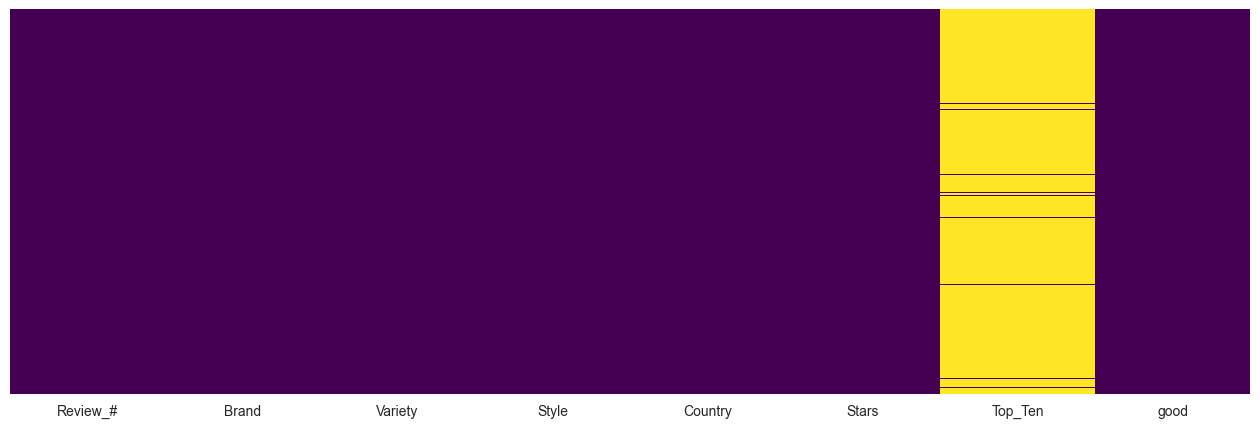

In [1721]:
plt.figure(figsize=(16, 5))

sns.heatmap(ramen_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [1722]:
pd.get_dummies(ramen_df['Style'], drop_first=True)
# Add binary variables for Style
ramen_df2 = pd.concat([ramen_df, pd.get_dummies(ramen_df['Style'])], axis=1)
ramen_df
ramen_df2

,Review_#,Brand,Variety,Style,Country,Stars,Top_Ten,good,Bar,Bowl,Box,Can,Cup,Pack,Tray
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,0,False,False,False,False,True,False,False
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,0,False,False,False,False,False,True,False
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,0,False,False,False,False,True,False,False
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,0,False,False,False,False,False,True,False
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,0,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0,False,True,False,False,False,False,False
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN,0,False,False,False,False,False,True,False
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN,0,False,False,False,False,False,True,False
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN,0,False,False,False,False,False,True,False


In [1723]:
# Add binary variables for Country
ramen_df3 = pd.concat([ramen_df2, pd.get_dummies(ramen_df2['Country'])], axis=1) 

ramen_df3

,Review_#,Brand,Variety,Style,Country,Stars,Top_Ten,good,Bar,Bowl,...,Sarawak,Singapore,South Korea,Sweden,Taiwan,Thailand,UK,USA,United States,Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,0,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,0,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0,False,True,...,False,False,False,False,False,False,False,False,False,True
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN,0,False,False,...,False,False,False,False,False,True,False,False,False,False
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN,0,False,False,...,False,False,False,False,False,True,False,False,False,False
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN,0,False,False,...,False,False,False,False,False,True,False,False,False,False


In [1724]:
# Add binary variables for Brand
ramen_df4 = pd.concat([ramen_df3, pd.get_dummies(ramen_df3['Brand'])], axis=1)
ramen_df3
ramen_df4

,Review_#,Brand,Variety,Style,Country,Stars,Top_Ten,good,Bar,Bowl,...,Xiuhe,Yamachan,Yamadai,Yamamori,Yamamoto,Yum Yum,Yum-Mie,Zow Zow,iMee,iNoodle
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1725]:
ramen_df4 = ramen_df4.fillna(0)
ramen_df4

,Review_#,Brand,Variety,Style,Country,Stars,Top_Ten,good,Bar,Bowl,...,Xiuhe,Yamachan,Yamadai,Yamamori,Yamamoto,Yum Yum,Yum-Mie,Zow Zow,iMee,iNoodle
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


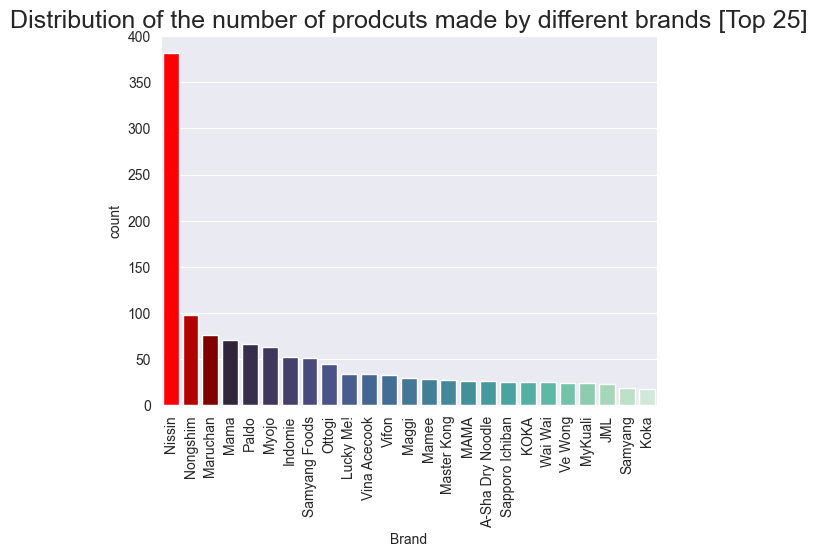

In [1726]:
Style_dict = {ramen_df4.Style.unique()[i]: i+1 for i in range(0,len(ramen_df4.Style.unique()))}
Brand_dict = {ramen_df4.Brand.unique()[i]: i+1 for i in range(0,len(ramen_df4.Brand.unique()))}
Country_dict = {ramen_df4.Country.unique()[i]: i+1 for i in range(0,len(ramen_df4.Country.unique()))}

r_data = ramen_df4[['Review_#','Brand','Variety','Style','Country','Stars']].copy()

r_data.Style.replace(Style_dict, inplace=True)
r_data.Brand.replace(Brand_dict, inplace=True)
r_data.Country.replace(Country_dict, inplace=True)
r_data = r_data[r_data['Stars'] != 'Unrated']

Brand_dict = {key : val for val, key in Brand_dict.items()}
Country_dict = {key : val for val, key in Country_dict.items()}
Style_dict = {key : val for val, key in Style_dict.items()}

top_25_brands = r_data['Brand'].value_counts().sort_values(ascending=False)[:25]

ax = sns.countplot(x=r_data[r_data['Brand'].isin(top_25_brands.index)]['Brand'], order = top_25_brands.index,
                palette='mako')


ax.set_xticklabels([Brand_dict[int(ax.get_xticklabels()[i].get_text())] for i in range(0,25)], rotation=90)

ax.patches[0].set_fc('r')
ax.patches[1].set_fc((0.7,0.0,0.0))
ax.patches[2].set_fc((0.5,0.0,0.0))
ax.set_title('Distribution of the number of prodcuts made by different brands [Top 25]', fontsize=18)
plt.show()

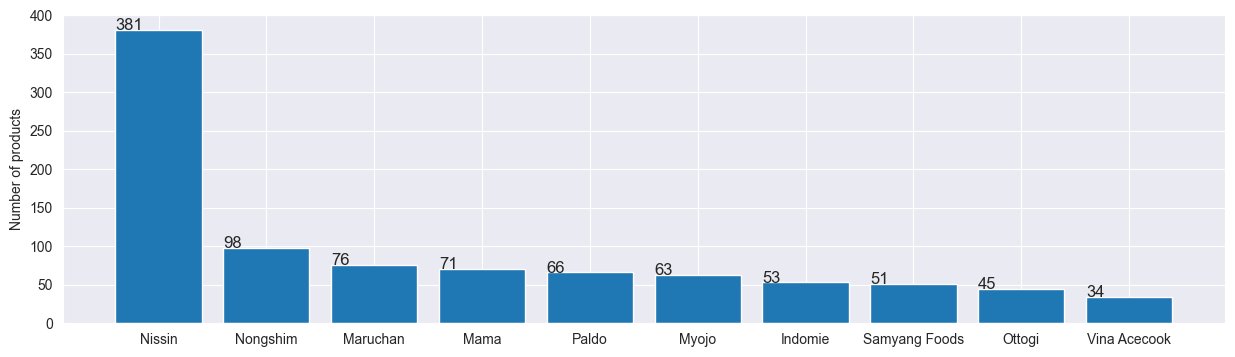

In [1727]:
brands_name = ramen_df4.Brand.value_counts()[:10].index
brand_size = ramen_df4.Brand.value_counts()[:10].values

fig,ax=plt.subplots(figsize=(15, 4))
ax.bar(brands_name, brand_size, data=ramen_df4)
ax.set_ylabel('Number of products')
for p in ax.patches:
    an = ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    an.set_size(12)

#### 從上圖可以知道 "Nissin" 有最多的泡麵種類，其次是 "Nongshim" 和 "Maruchan"

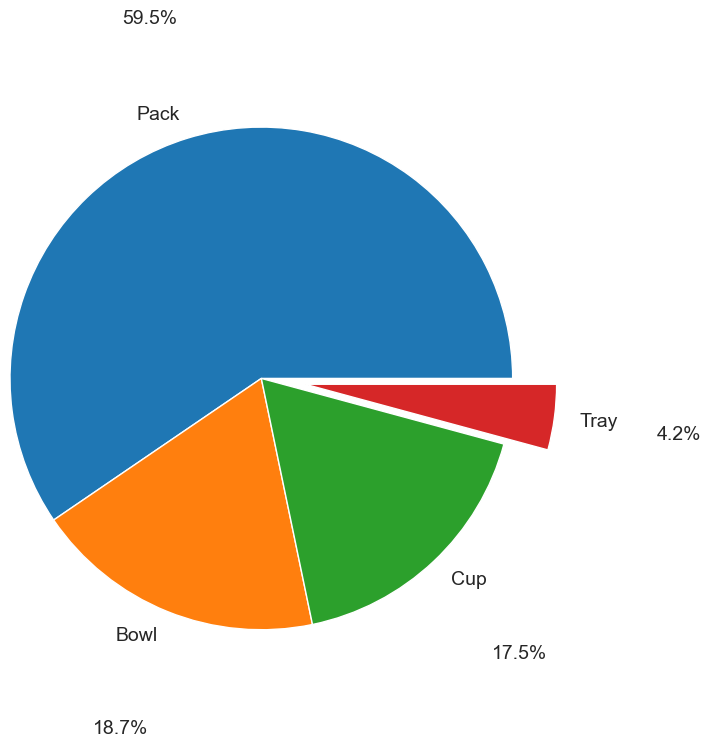

In [1728]:
style = ramen_df4.Style.value_counts()
plt.pie(style[0:4], pctdistance=1.5, autopct="%2.01f%%", radius=1.7, labels=['Pack','Bowl','Cup','Tray'],
        explode=[0,0,0,0.3], textprops={'fontsize': 14})
plt.show()

#### 從上圖可以知道，包裝種類中 "Pack" 是最受歡迎的，佔 59.6% 其次是 "Bowl" 和 "Cup" (各佔約 18%)

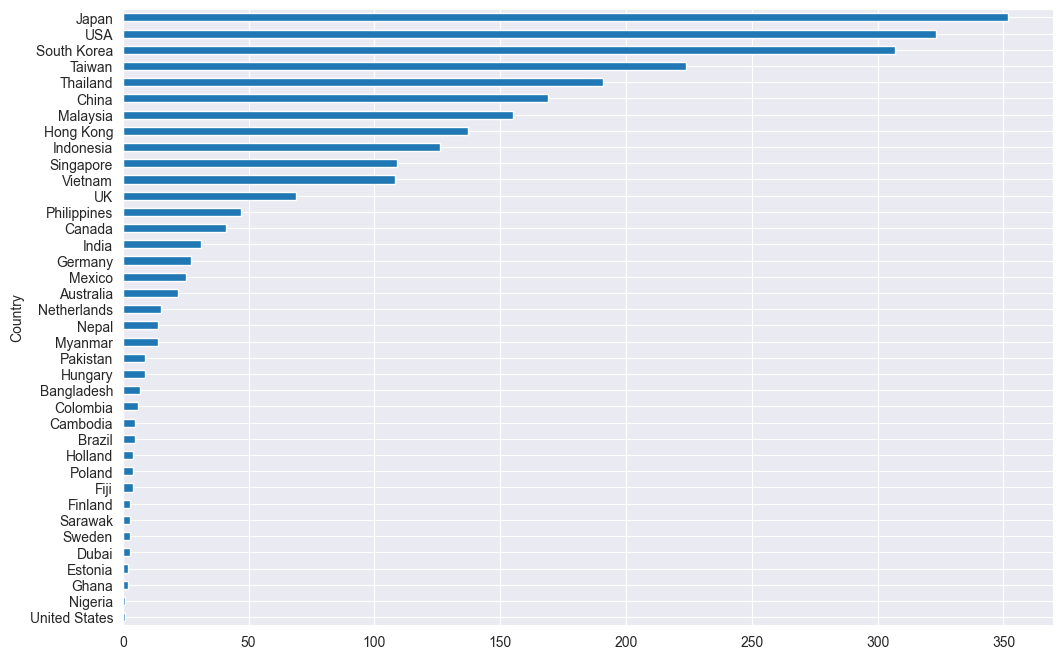

In [1729]:
v = ramen_df4.Country.value_counts()
v = v.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12, 8))
v.plot(kind='barh')
plt.show()

### 根據上圖，發現日本、美國和南韓是泡麵的前三大消費國
#### 泡麵在亞洲國家如日本、中國、南韓等非常受歡迎且廣泛喜愛。但美國和英國則是例外。可能是因為來自亞洲國家的移民到美國和英國的人數很多，這導致了這兩個國家對泡麵的消費量很高。

In [1730]:
# Group ramen_data by Country and Brand column 
# and calculate the mean and median of Stars that each brand received

ramen_data = ramen_df.copy()
ramen_data['Stars'] = pd.to_numeric(ramen_data['Stars'], errors = 'coerce')
ramen_data['Brand'] = ramen_data['Brand'].str.lower()

ramen_stars = ramen_data.groupby(['Country','Brand']).agg({'Stars': ['mean', 'median'], 'Review_#': 'count'})
ramen_stars = ramen_stars.reset_index()
ramen_stars.columns = ['Country','Brand','Mean Stars', 'Median Stars', 'Review#']
ramen_stars = ramen_stars.sort_values('Median Stars', ascending = False)

# Create new column for label
ramen_stars['Country Brand'] = ramen_stars['Brand'] + ' (' + ramen_stars['Country'] + ')'
ramen_stars.head()

,Country,Brand,Mean Stars,Median Stars,Review#,Country Brand
1,Australia,maggi,5.000000,5.0,1,maggi (Australia)
139,Japan,peyang,5.000000,5.0,1,peyang (Japan)
297,Taiwan,tseng noodles,4.821429,5.0,7,tseng noodles (Taiwan)
172,Malaysia,daddy,5.000000,5.0,1,daddy (Malaysia)
85,India,patanjali,5.000000,5.0,1,patanjali (India)


#### 為了進行公平比較，平均星級應該僅在至少收到10則評論的品牌之間進行比較

In [1731]:
# View the top 5 brands with the highest average stars (sort by mean)
ramen_stars_re = ramen_stars[ramen_stars['Review#'] >= 10].reset_index()
ramen_stars_re = ramen_stars_re.sort_values('Mean Stars', ascending = False)
ramen_stars_re.head()

,index,Country,Brand,Mean Stars,Median Stars,Review#,Country Brand
0,182,Malaysia,mykuali,4.940476,5.000,21,mykuali (Malaysia)
2,397,USA,yamachan,4.568182,4.750,11,yamachan (USA)
1,300,Taiwan,uni-president,4.325000,4.875,10,uni-president (Taiwan)
3,135,Japan,nissin,4.259910,4.500,111,nissin (Japan)
6,196,Malaysia,vit's,4.211538,4.250,13,vit's (Malaysia)


In [1732]:
# View the top 5 brands with the lowest average stars (sort by mean)
ramen_stars_re.tail()

,index,Country,Brand,Mean Stars,Median Stars,Review#,Country Brand
63,343,UK,pot noodle,3.000000,3.25,11,pot noodle (UK)
62,337,UK,batchelors,2.921875,3.25,16,batchelors (UK)
64,334,Thailand,wai wai,2.879545,3.00,22,wai wai (Thailand)
65,12,Canada,mr. noodles,2.016667,2.00,15,mr. noodles (Canada)
66,18,China,baijia,1.250000,0.50,11,baijia (China)


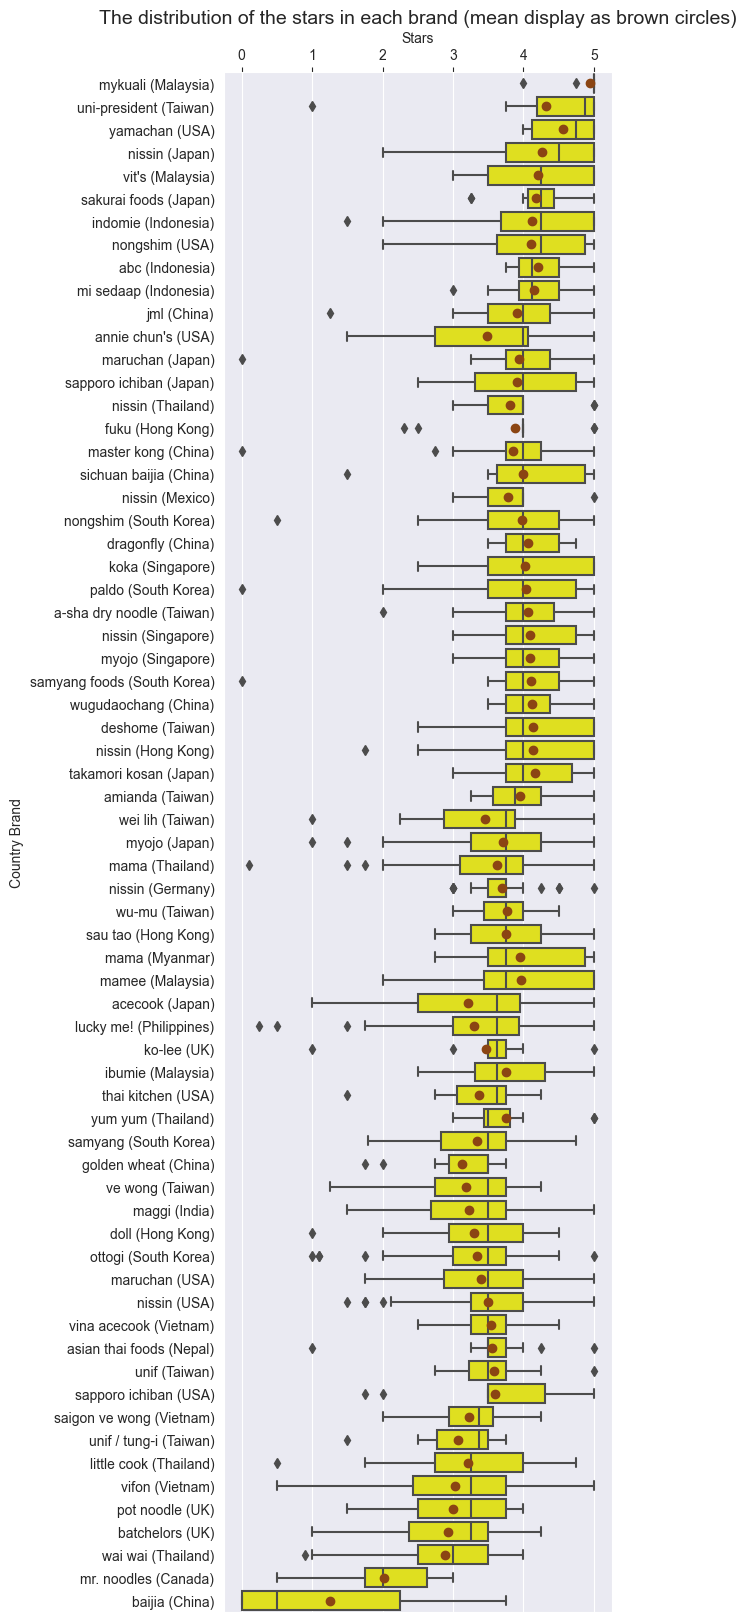

In [1733]:
# Create box plot with mean
# Sort by median of the stars for the order in box plot
ramen_stars_re = ramen_stars_re.sort_values('Median Stars', ascending = False)

# Create boxplot
ramen_box = ramen_data[['Country','Brand','Stars']].reset_index()
ramen_box['Country Brand'] = ramen_box['Brand'] + ' (' + ramen_box['Country'] + ')'

# Select only brand in country that in ramen_stars_re
ramen_box = ramen_box[ramen_box['Country Brand'].isin(ramen_stars_re['Country Brand'])]

# Create boxplot
fig, ax = plt.subplots(figsize=(5, 20))
sns.boxplot(x = 'Stars', y = 'Country Brand', data = ramen_box, color = 'yellow',\
            order = ramen_stars_re['Country Brand'], showmeans = True,\
            meanprops = {'marker': 'o','markerfacecolor': 'saddlebrown', 'markeredgecolor': 'saddlebrown'})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.title( 'The distribution of the stars in each brand (mean display as brown circles)', \
        fontsize=14)
plt.show()

In [1734]:
# Create word cloud of product name for the top 100 and the bottom 100 ramen products
# Find the top 100 and the bottom 100 according to the stars the product received and 
# compare the words that they used to describe the products

# Rank ramen by Stars column
ramen_sort = ramen_data.sort_values('Stars').dropna(subset = ['Stars'])

# Split into top 100 and bottom 100
ramen_top = ramen_sort.head(100)
ramen_bottom = ramen_sort.tail(100)
ramen_bottom.head()

,Review_#,Brand,Variety,Style,Country,Stars,Top_Ten,good
870,1710,chering chang,Instant Non-Fried Noodles Vegetable Curry Flavor,Pack,Taiwan,5.0,NaN,1
276,2304,maggi,2 Minute Noodles Masala Spicy,Pack,India,5.0,NaN,1
867,1713,carjen,Otentiq Cheezy Mushroom Instant Noodles,Pack,Malaysia,5.0,NaN,1
297,2283,nissin,Raoh Pork Bone Soy Soup Noodle,Pack,Japan,5.0,NaN,1
298,2282,samyang foods,Gold Jjamppong Fried Noodle,Pack,South Korea,5.0,NaN,1


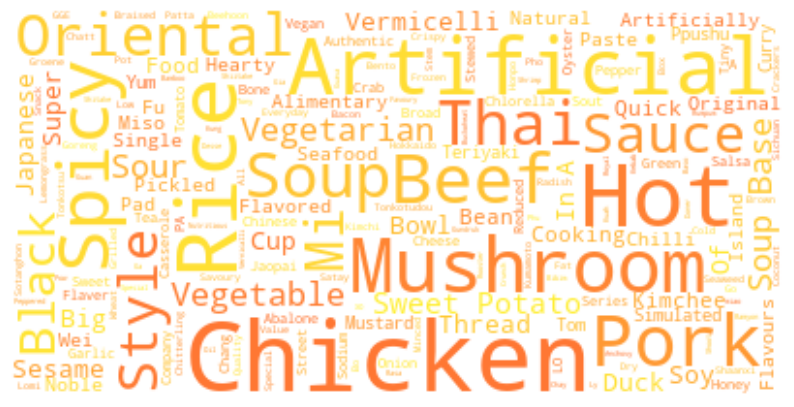

In [1735]:
import random
from wordcloud import WordCloud

# Join the top 100 ramen product name into a string
ramen_top_str = ramen_top['Variety'].str.cat(sep=',')

# For generate color
def orange_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(%d, 100%%, 60%%)" % random.randint(20, 55)

# Plot word cloud of the top 100
stopword_list = ['Noodle', 'Noodles', 'Instant Noodle', 'Instant', 'Flavor', 'Flavour', 'Ramen', 'With']
plt.figure(figsize=(10,6))
top_wordcloud = WordCloud(max_font_size= 50, background_color='white', \
                    prefer_horizontal = 0.7, stopwords = stopword_list).generate(ramen_top_str)
plt.imshow(top_wordcloud.recolor(color_func = orange_color_func, random_state = 3), interpolation='bilinear')
plt.axis('off')
plt.show()

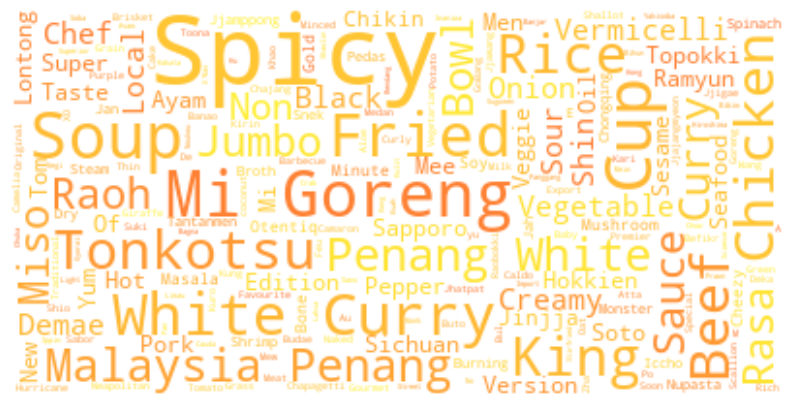

In [1736]:
# Join the bottom 100 ramen product name into a string
ramen_bottom_str = ramen_bottom['Variety'].str.cat(sep=',')

# Plot word cloud of the bottom 100
plt.figure(figsize=(10,6))
wordcloud_bottom = WordCloud(max_font_size= 50, background_color='white', \
                    prefer_horizontal = 0.7, stopwords = stopword_list).generate(ramen_bottom_str)
plt.imshow(wordcloud_bottom.recolor(color_func = orange_color_func, random_state = 3), interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [1737]:
# More feature engineering
# 除了創建 Country 和 Style 的二進制變數外，因為名稱越長越難記住，我猜品牌名稱的長度和種類可能會對評分產生影響

ramen_df4['brand_length'] = ramen_df4['Brand'].str.len()
ramen_df4['style_length'] = ramen_df4['Variety'].str.len()
ramen_df4['spicy'] = ramen_df4['Variety'].copy()
ramen_df4['spicy'] = ramen_df4['spicy'].astype(str)

def spicy_replace(x):
    if ('Spicy' in x or 'hot' in x or 'Kimchi' in x or 'Hot' in x or 'Tom Yum' in x or 'Curry' in x or 'Chili' in x or 'Tantanmen' in x or 'Pedas' in x or 'Laksa' in x):
        return 1
    else:
        return 0
ramen_df4['spicy'] = ramen_df4['spicy'].apply(spicy_replace)

ramen_df4['premium'] = ramen_df4['Variety'].copy()
def premium_replace(x):
    if ('Premium' in x or 'Special' in x or 'Signature' in x or 'Supreme' in x):
        return 1
    else:
        return 0
ramen_df4['premium'] = ramen_df4['premium'].apply(premium_replace)

ramen_df4['seafood'] = ramen_df4['Variety'].copy()
def seafood_replace(x):
    if ('Seafood' in x or 'Shrimp' in x or 'Prawn' in x or 'Crab' in x or 'Palabok' in x):
        return 1
    else:
        return 0
ramen_df4['seafood'] = ramen_df4['seafood'].apply(seafood_replace)

ramen_df4['miso'] = ramen_df4['Variety'].copy()
def miso_replace(x):
    if ('Miso' in x):
        return 1
    else:
        return 0
ramen_df4['miso'] = ramen_df4['miso'].apply(miso_replace)

# fried
ramen_df4['fried'] = ramen_df4['Variety'].copy()
def fried_replace(x):
    if ('Goreng' in x or 'Yakisoba' in x or 'Stir Fry' in x or 'Stir Fried' in x or 'Dry' in x or 'Chow Mein' in x):
        return 1
    else:
        return 0
ramen_df4['fried'] = ramen_df4['fried'].apply(fried_replace)

# artificial
ramen_df4['artificial'] = ramen_df4['Variety'].copy()
def artificial_replace(x):
    if ('Artificial' in x):
        return 1
    else:
        return 0
ramen_df4['artificial'] = ramen_df4['artificial'].apply(artificial_replace)

# vegetarian
ramen_df4['vegetarian'] = ramen_df4['Variety'].copy()
def veg_replace(x):
    if ('Vegetarian' in x or 'Imitation' in x):
        return 1
    else:
        return 0
ramen_df4['vegetarian'] = ramen_df4['vegetarian'].apply(veg_replace)

# pork
ramen_df4['pork'] = ramen_df4['Variety'].copy()
def pork_replace(x):
    if ('Pork' in x or 'Buta' in x or 'Tonkotsu' in x):
        return 1
    else:
        return 0
ramen_df4['pork'] = ramen_df4['pork'].apply(pork_replace)

# chicken
ramen_df4['chicken'] = ramen_df4['Variety'].copy()
def chicken_replace(x):
    if ('Chicken' in x or 'Ayam' in x):
        return 1
    else:
        return 0
ramen_df4['chicken'] = ramen_df4['chicken'].apply(chicken_replace)

# beef
ramen_df4['beef'] = ramen_df4['Variety'].copy()
def beef_replace(x):
    if ('Beef' in x or 'Gyu' in x):
        return 1
    else:
        return 0
ramen_df4['beef'] = ramen_df4['beef'].apply(beef_replace)


# big or hearty
ramen_df4['big'] = ramen_df4['Variety'].copy()
def big_replace(x):
    if ('Big' in x or 'Hearty' in x):
        return 1
    else:
        return 0
ramen_df4['big'] = ramen_df4['big'].apply(big_replace)

# cream
ramen_df4['cream'] = ramen_df4['Variety'].copy()
def cream_replace(x):
    if ('Cream' in x or 'Creamy' in x or 'Carbonara' in x):
        return 1
    else:
        return 0
ramen_df4['cream'] = ramen_df4['cream'].apply(cream_replace)

# diff_noodle
ramen_df4['diff_noodle'] = ramen_df4['Variety'].copy()
def noodle_replace(x):
    if ('Udon' in x or 'Soba' in x or 'Vermicelli ' in x):
        return 1
    else:
        return 0
ramen_df4['diff_noodle'] = ramen_df4['diff_noodle'].apply(noodle_replace)
ramen_df4.head()

,Review_#,Brand,Variety,Style,Country,Stars,Top_Ten,good,Bar,Bowl,...,miso,fried,artificial,vegetarian,pork,chicken,beef,big,cream,diff_noodle
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,0,False,False,...,0,0,0,0,0,0,0,0,0,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,0,0,False,False,...,0,0,0,0,0,0,0,0,0,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,0,False,False,...,0,0,0,0,0,1,0,0,0,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0,0,False,False,...,0,0,0,0,0,0,0,0,0,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0,0,False,False,...,0,0,0,0,0,0,0,0,0,0


In [1738]:
# Data cleaning
ramen_df4 = ramen_df4[~ramen_df4.Stars.str.contains("Unrated")]
ramen_df4 = ramen_df4.drop(['Top_Ten'], axis=1)

<Axes: xlabel='Stars', ylabel='Density'>

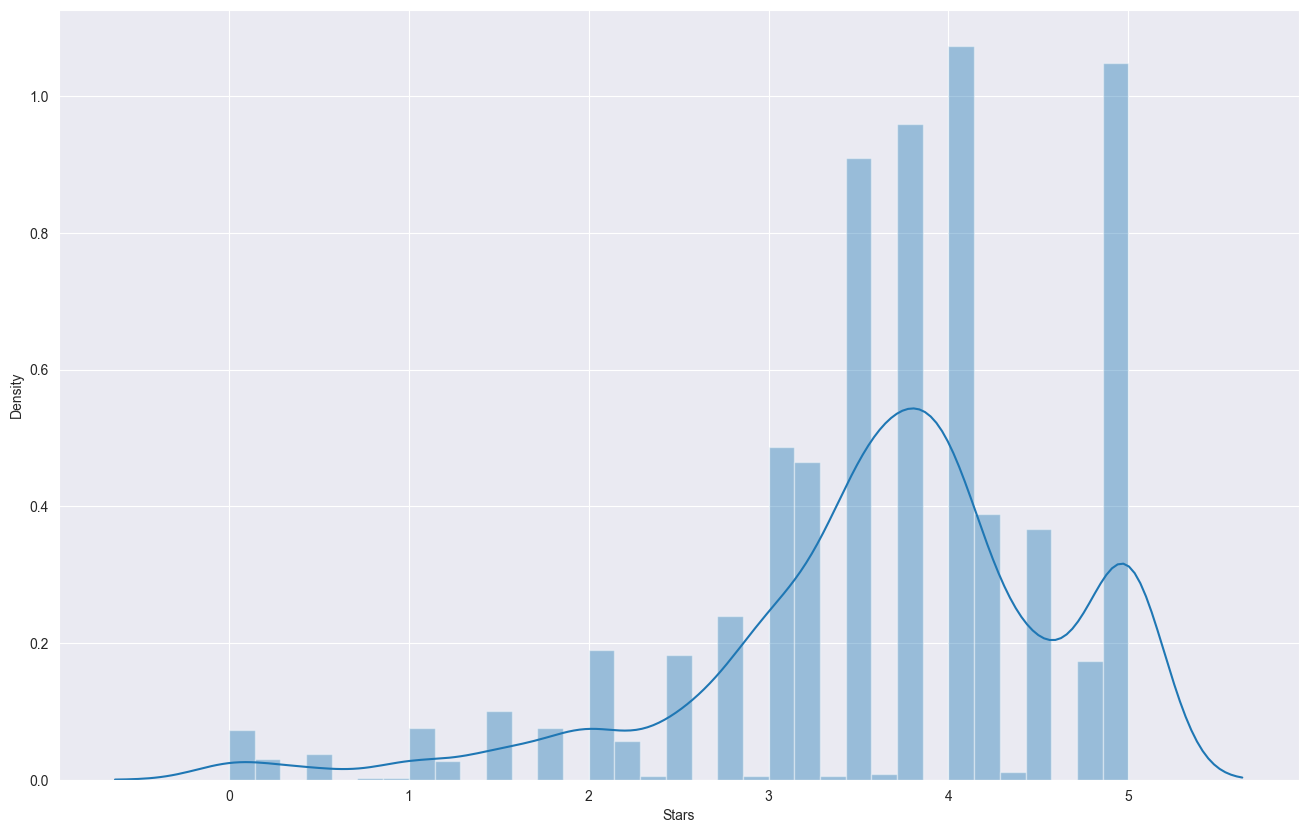

In [1739]:
# 想知道 stars 是否符合正態分佈
plt.figure(figsize=(16, 10))

ramen_df4 = ramen_df4[~ramen_df4.Stars.str.contains("Unrated")]
ramen_df4['Stars'] = ramen_df4['Stars'].astype(float)
sns.distplot(ramen_df4['Stars'])
# 看來應該不是正態分佈

#### The plot of density of "Stars" shows that it is "Left Skewed".


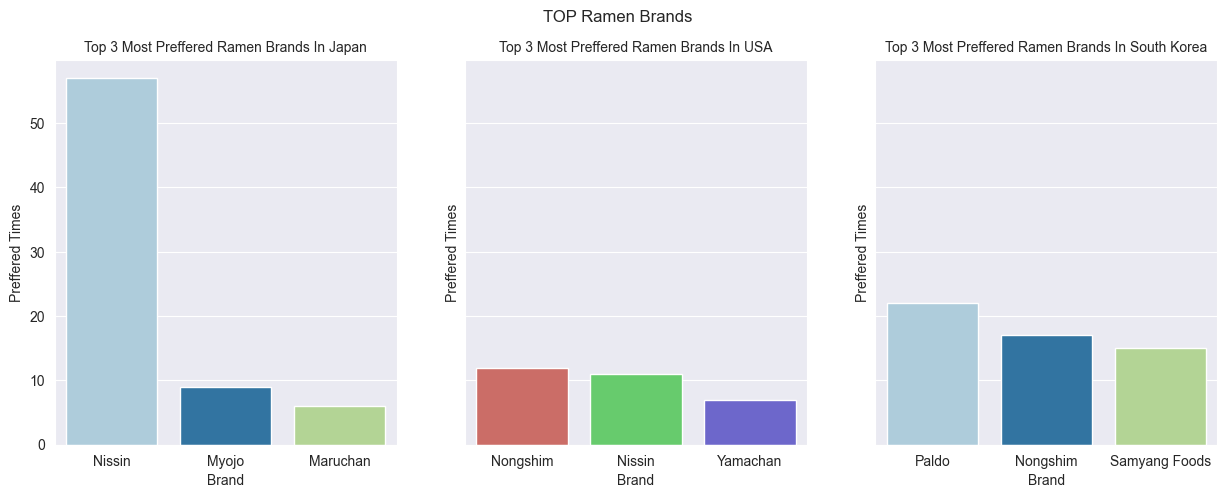

In [1740]:
japan = ramen_df4.loc[(ramen_df4['Country'] == 'Japan') & (ramen_df4['Stars'].apply(lambda x: float(x)) >= 4.5)]
usa = ramen_df4.loc[(ramen_df4['Country'] == 'USA') & (ramen_df4['Stars'].apply(lambda x: float(x)) >= 4.5)]
south_korea = ramen_df4.loc[(ramen_df4['Country'] == 'South Korea') & (ramen_df4['Stars'].apply(lambda x: float(x)) >= 4.5)]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Title
fig.suptitle('TOP Ramen Brands')
axes[0].set_title('Top 3 Most Preffered Ramen Brands In Japan', fontsize=10)
axes[1].set_title('Top 3 Most Preffered Ramen Brands In USA', fontsize=10)
axes[2].set_title('Top 3 Most Preffered Ramen Brands In South Korea', fontsize=10)
axes[0].set_ylabel('Preffered Times', fontsize=10)
axes[0].set_xlabel('Brands', fontsize=10)
axes[1].set_ylabel('Preffered Times', fontsize=10)
axes[1].set_xlabel('Brands', fontsize=10)
axes[2].set_ylabel('Preffered Times', fontsize=10)
axes[2].set_xlabel('Brands', fontsize=10)

# Japan
x_jp= japan['Brand'].value_counts()
x_jp= x_jp[:3,]
sns.barplot(ax=axes[0], x=x_jp.index, y=x_jp.values, palette="Paired")

# USA
x_usa= usa['Brand'].value_counts()
x_usa= x_usa[:3,]
sns.barplot(ax=axes[1], x=x_usa.index, y= x_usa.values, palette="hls")

# South Korea
x_sk= south_korea['Brand'].value_counts()
x_sk= x_sk[:3,]
sns.barplot(ax=axes[2], x=x_sk.index, y= x_sk.values, palette="Paired")
plt.show()

In [1741]:
# To create spiciness pivot table
ramen_df5 = ramen_df4
ramen_df5['Spiciness'] = ramen_df4['spicy'].copy()

def sp_replace(x):
    if x == 1:
        return 'spicy'
    else:
        return 'non-spicy'
ramen_df5['Spiciness'] = ramen_df4['Spiciness'].apply(sp_replace)

classtype_gb = ramen_df5.groupby('Spiciness')
classtype_gb
print(classtype_gb['Stars'].mean())
print(classtype_gb['Stars'].median())

Spiciness
non-spicy    3.614698
spicy        3.779273
Name: Stars, dtype: float64
Spiciness
non-spicy    3.75
spicy        3.75
Name: Stars, dtype: float64


In [1742]:
ramen_df4['Stars'] = ramen_df4['Stars'].astype(int)

In [1743]:
ramen_df4 = ramen_df4.drop(['Spiciness'], axis=1)

In [1744]:
# 只使用 Style 和 Country 進行回歸測試
X = ramen_df4.iloc[:, 6:].values
y = ramen_df4.iloc[:, 5].values

In [1745]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 使用 SelectKBest class 提取前十個最佳特徵
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(ramen_df4.columns)

# 合併兩個 dataframes 以便更好的 visualization
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(35, 'Score'))  # print 35 best features

              Specs        Score
0          Review_#  1440.178086
65     Annie Chun's   156.115336
402         Yum Yum   153.237043
227           Morre   111.215632
281        Qin Zong    93.444444
12             Pack    91.552776
223         Miliket    64.212179
75       Batchelors    64.065630
27          Holland    53.506319
310          Sempio    47.199955
91      Chorip Dong    46.722222
100         Daifuku    46.722222
149       Healtimie    46.722222
173  Kabuto Noodles    46.722222
219        Mi E-Zee    46.722222
233         MyKuali    46.722222
234           MyOri    46.722222
249       Nyor Nyar    46.722222
351   Thai Pavilion    46.722222
362         Torishi    46.722222
384         Wai Wai    46.722222
26            Ghana    45.830954
196          Lipton    42.590703
45           Sweden    42.305724
271      Pot Noodle    39.733161
64            Amino    37.625141
90   Ching's Secret    37.625141
414      artificial    33.872196
42          Sarawak    33.796186
135      G

In [1746]:
# 只使用 Style 和 Country 進行回歸測試
X = ramen_df4.iloc[:, 6:51].values # 泡麵的風格和所屬的國家
y = ramen_df4.iloc[:, 5].values

LR: 0.697735 (0.042538)
LDA: 0.690366 (0.041799)
KNN: 0.632935 (0.047104)
CART: 0.688422 (0.039427)
NB: 0.215353 (0.024605)
SVM: 0.694632 (0.042043)


<Figure size 1600x1000 with 0 Axes>

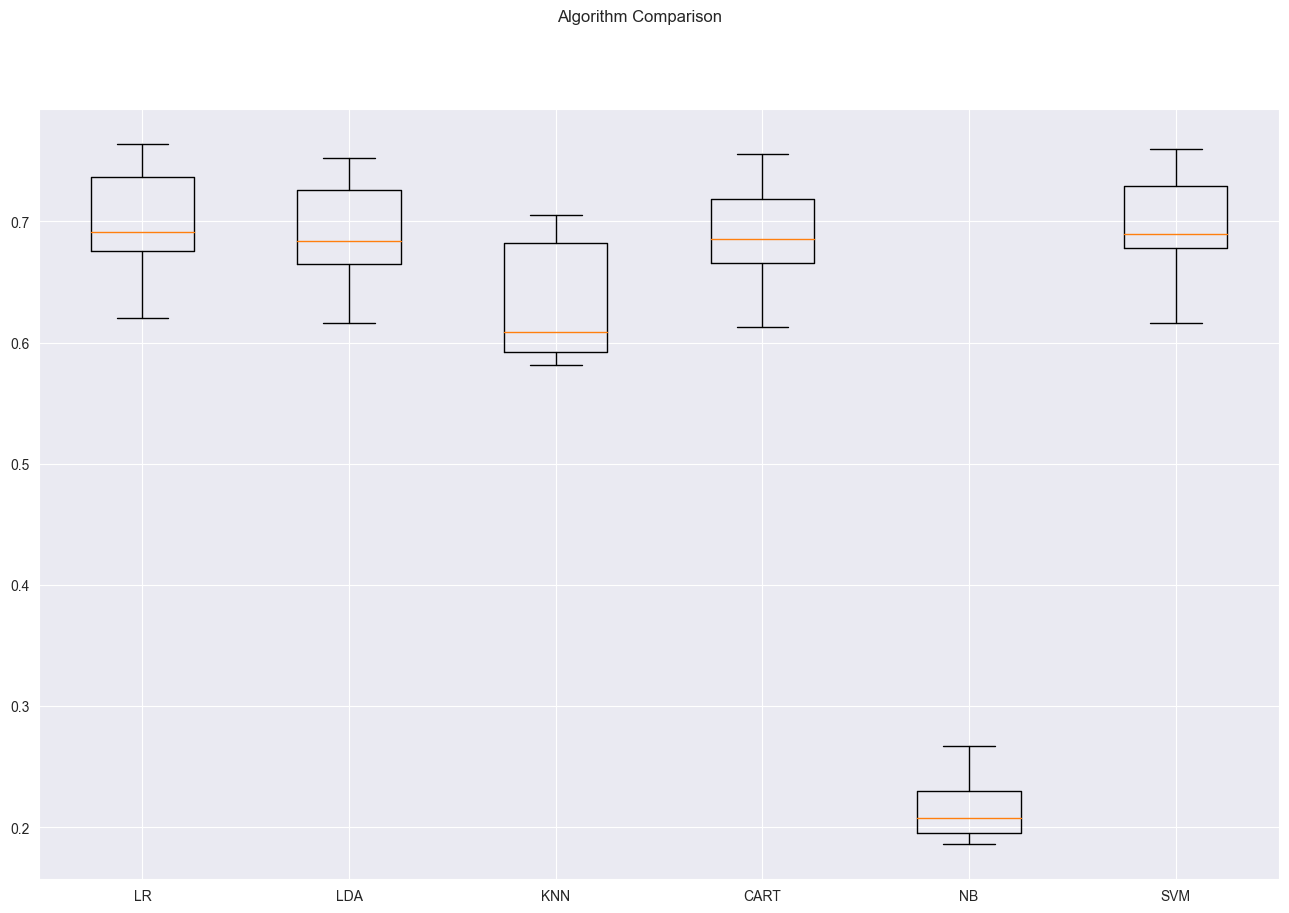

In [1747]:
# Compare Algorithms
# 輸出各模型使用 cv 的方式計算出的平均 validation error 和 validation errors 的標準差

plt.figure(figsize=(16,10))

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 基於泡麵的風格和所屬的國家來預測評分
dataframe = ramen_df4
Y = ramen_df4.iloc[:, 5].values # 泡麵評分
seed = 7

# Prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True) # 交叉驗證
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure(figsize=(16,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Train score:
0.6991751576904416
Test score:
0.7073643410852714
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        14
           2       0.20      0.02      0.04        47
           3       0.74      0.98      0.85       211
           4       0.70      0.89      0.79       156
           5       0.51      0.24      0.32        76

    accuracy                           0.71       516
   macro avg       0.36      0.36      0.33       516
weighted avg       0.61      0.71      0.63       516



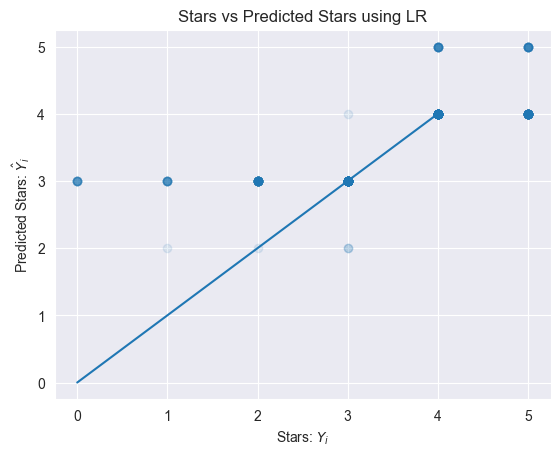

In [1748]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)


print("Train score:")
print(lr.score(X_train, y_train))

print("Test score:")
print(lr.score(X_test, y_test))

print(classification_report(y_test, y_predict))

plt.scatter(y_test, y_predict, alpha=0.1)
plt.plot(range(5), range(5))

plt.xlabel("Stars: $Y_i$")
plt.ylabel("Predicted Stars: $\hat{Y}_i$")
plt.title("Stars vs Predicted Stars using LR")
plt.show()


Mean Absolute Error: 0.5168241946138032
Mean Squared Error: 0.44761319746764067
Root Mean Squared Error: 0.6690390104228906
Out-of-bag R-2 score estimate:  0.64
Test data R-2 score: 0.625
Test data Spearman correlation: 0.8
Test data Pearson correlation: 0.792


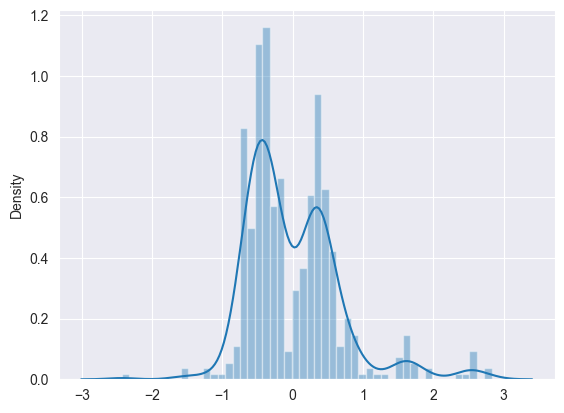

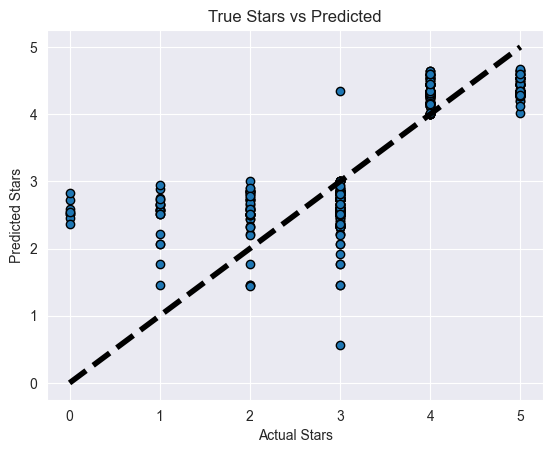

In [1749]:
# RF（隨機森林）沒有進行比較，所以嘗試使用 RF regressor 並評估模型

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# RF fitting
regressor = RandomForestRegressor(n_estimators=20, oob_score=True, random_state=0)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

# Model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

# 在測試數據上使用 Random Forest 模型的預測方法
y_predict = regressor.predict(X_test)
y_test  =y_test.astype(float)
residuals = y_predict - y_test

sns.distplot((residuals),bins=50)

# 進一步評估指標
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor as rf

predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
# 對於 Pearso 和 Spearman 的相關性：
# 0.10 至 0.29 之間的相關係數表示微弱關聯
# 0.30 至 0.49 之間的相關係數表示中等關聯
# 0.50 及以上的相關係數表示較強的關聯或關係

# 將模型運行在測試數據上
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual Stars')
ax.set_ylabel('Predicted Stars')
ax.set_title("True Stars vs Predicted")
plt.show()


None
Train score:
0.6609350836654422
Test score:
0.6278166131422331


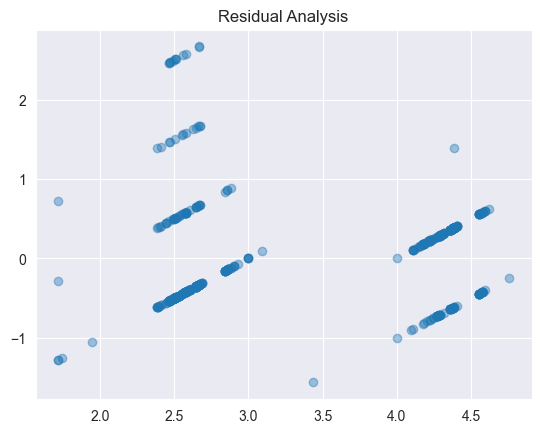

In [1750]:
# Try 線性回歸（Linear Regression）模型

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)

def x_round(x):
    round(x * 4) / 4
print(x_round(y_predict[0]))

print("Train score:")
print(lm.score(X_train, y_train))

print("Test score:")
print(lm.score(X_test, y_test))

residuals = y_predict - y_test
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()

<Axes: ylabel='Density'>

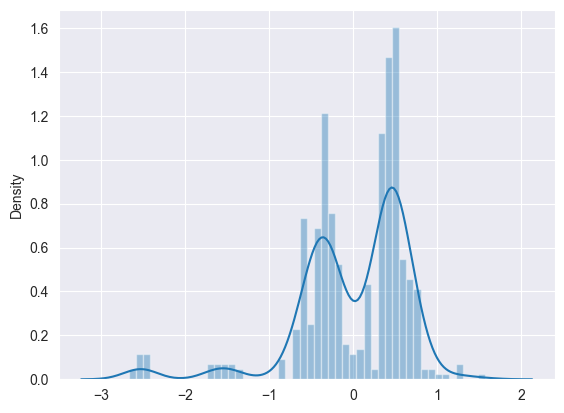

In [1751]:
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=50)

Train score:
0.6609350836654422
Test score:
0.6278166131422331


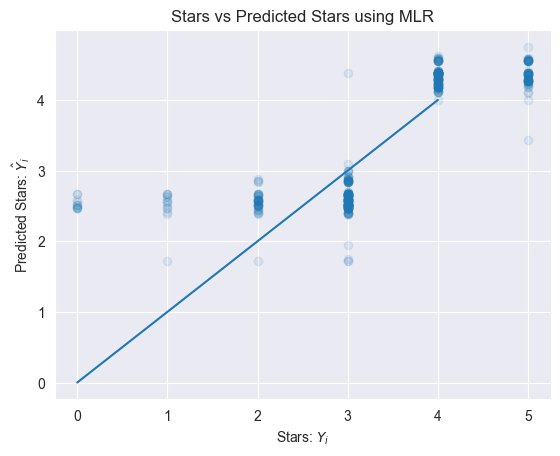

In [1752]:
model = lm.fit(X_train, y_train)

y_predict = lm.predict(X_test)

print("Train score:")
print(lm.score(X_train, y_train))

print("Test score:")
print(lm.score(X_test, y_test))

plt.scatter(y_test, y_predict, alpha=0.1)
plt.plot(range(5), range(5))

plt.xlabel("Stars: $Y_i$")
plt.ylabel("Predicted Stars: $\hat{Y}_i$")
plt.title("Stars vs Predicted Stars using MLR")

plt.show()

KNR training set score: 0.6794918790868083
KNR test set score: 0.6213464096149872
0.6612144584132842
0.6213464096149872


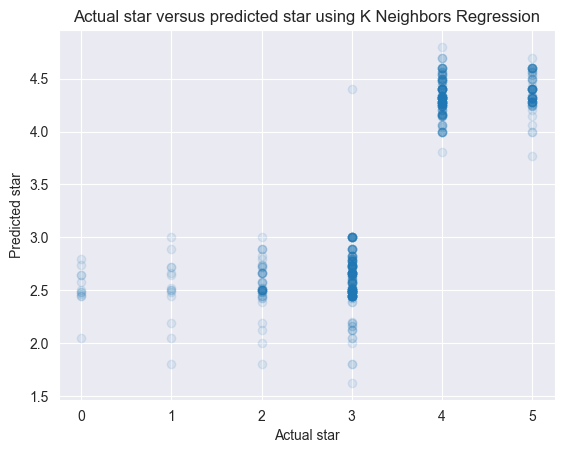

In [1753]:
# 同時也嘗試 KNR 模型

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

kn_regressor = KNeighborsRegressor(n_neighbors = 50, weights = "distance")
kn_regressor.fit(X_train, y_train)

knr_training_score = kn_regressor.score(X_train, y_train)
print("KNR training set score: %s" %(knr_training_score))

knr_test_score = kn_regressor.score(X_test, y_test)
print("KNR test set score: %s" %(knr_test_score))

knr_predictions = kn_regressor.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, knr_predictions))) #计算均方差根判断效果
print(r2_score(y_test, knr_predictions)) #计算均方误差回归损失，越接近于1拟合效果越好

plt.scatter(y_test, knr_predictions,  alpha=0.1)
plt.title("Actual star versus predicted star using K Neighbors Regression")
plt.xlabel("Actual star")
plt.ylabel("Predicted star")
plt.show()

In [1754]:
ramen_df4 = ramen_df4.rename(columns={"Annie Chun's": "Annie Chun"})

In [1755]:
# 選擇特徵並對數據進行縮放以進行分析

from sklearn.preprocessing import scale

list_of_features_classification = [ # x : 基於 KSelectBest 的前15個最佳特徵
    'Annie Chun',
    'Yum Yum',
    'Morre',
    'Qin Zong',
    'Miliket',
    'Pack',
    'Batchelors',
    'Miliket',
    'Holland',
    'Sempio',
    'Chorip Dong',
    'Daifuku',
    'Healtimie',
    'Kabuto Noodles',
    'Mi E-Zee',
    'MyKuali',
    'MyOri',
    'Nyor Nyar'
]

features_classification = ramen_df4[list_of_features_classification]
scaled_features_classification = scale(features_classification, axis=0)
labels = ramen_df4['good'] # y : 一個二元變量，如果評分 >3.75，y=1，否則 y=0

In [1756]:
# 產生測試資料和訓練資料

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_features_classification, labels, test_size=0.2, random_state=40)

In [1757]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=76)
knn_classifier.fit(train_data, train_labels)

knn_training_score = knn_classifier.score(train_data, train_labels)
print("KNN training set score: %s" %(knn_training_score))

knn_test_score = knn_classifier.score(test_data, test_labels)
print("KNN test set score: %s" %(knn_test_score))

KNN training set score: 0.5618631732168851
KNN test set score: 0.6065891472868217


In [1758]:
# 為 KNN classifier 生成分類報告和混淆矩陣

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

knn_predictions = knn_classifier.predict(test_data)
print("accuracy: ", accuracy_score(test_labels, knn_predictions))
print(confusion_matrix(test_labels, knn_predictions))
print(classification_report(test_labels, knn_predictions))

accuracy:  0.6065891472868217
[[309   0]
 [203   4]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       309
           1       1.00      0.02      0.04       207

    accuracy                           0.61       516
   macro avg       0.80      0.51      0.40       516
weighted avg       0.76      0.61      0.47       516



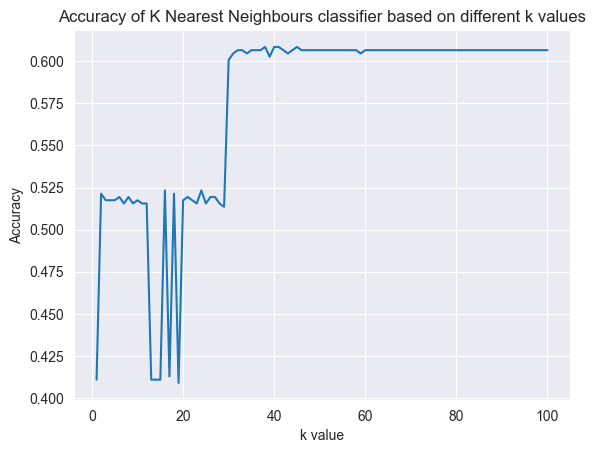

{'k': 38, 'score': 0.6085271317829457}


In [1759]:
# 生成圖表，顯示基於不同的 n_neighbors 值的 KNN classifier 得分，並輸出得分最高的 n_neighbors 值

scores = []

highest_score = {
    'k': 0,
    'score': 0
}

for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'k': k,
            'score': score
        }

x_values = range(1, 101)

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of K Nearest Neighbours classifier based on different k values')
plt.ylabel('Accuracy')
plt.xlabel('k value')
plt.show()
print(highest_score)

In [1760]:
# 使用 Support Vector Machine 進行分類
from sklearn.svm import SVC

svc_classifier = SVC(kernel='rbf', gamma=10)
svc_classifier.fit(train_data, train_labels)

svc_training_score = svc_classifier.score(train_data, train_labels)
print("SVC training set score: %s" %(svc_training_score))

svc_test_score = classifier.score(test_data, test_labels)
print("SVC test set score: %s" %(svc_test_score))

SVC training set score: 0.5696263949539059
SVC test set score: 0.6065891472868217


In [1761]:
# 為 Support Vector Machine classifier 生成分類報告和混淆矩陣

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

svc_predictions = svc_classifier.predict(test_data)
print("accuracy: ", accuracy_score(test_labels, svc_predictions))
print(confusion_matrix(test_labels, svc_predictions))
print(classification_report(test_labels, svc_predictions))

accuracy:  0.5988372093023255
[[304   5]
 [202   5]]
              precision    recall  f1-score   support

           0       0.60      0.98      0.75       309
           1       0.50      0.02      0.05       207

    accuracy                           0.60       516
   macro avg       0.55      0.50      0.40       516
weighted avg       0.56      0.60      0.47       516



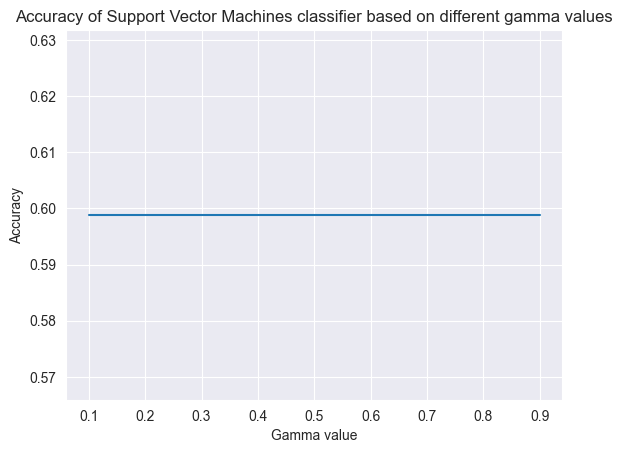

{'gamma': 0.1, 'score': 0.5988372093023255}


In [1762]:
# 生成圖表，顯示基於不同 gamma 值的 Support Vector Machine classifier 得分，並輸出得分最高的 gamma 值

scores = []

highest_score = {
    'gamma': 0,
    'score': 0
}

gamma_values = np.arange(0.1, 1.0, 0.1)

for val in gamma_values:
    svc_classifier = SVC(kernel='rbf', gamma=val)
    svc_classifier.fit(train_data, train_labels)
    score = svc_classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'gamma': val,
            'score': score
        }

x_values = gamma_values

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of Support Vector Machines classifier based on different gamma values')
plt.ylabel('Accuracy')
plt.xlabel('Gamma value')
plt.show()
print(highest_score)